In [160]:
import pandas as pd
import matplotlib.pyplot as plt 

In [4]:
RESULTS_FOLDER = "../results/"

In [206]:
FILENAME = "birch--triangle-100-3-30-random"

In [207]:
def parseNonHeuristic(line, columns):
    # drop the brackets and "non-heuristic," at the start
    line = line[15:-1]
    result = [element.lstrip() for element in line.split(",")] # remove whitespaces
    df = pd.DataFrame([result], columns=columns)
    return df

def parseHeuristic(line, columns):
    # drop the brackets
    line = line[11:-1]
    result = [element.lstrip() for element in line.split(",")] # remove whitespaces
    df = pd.DataFrame([result], columns=columns)
    return df

def parseRunResult(result, nonHeuristicDf, heuristicDf):
    line = line[1:-1]
    runner = result[0].split(":")[0]
    parseNonHeuristic(result[1])
    print("Runner", runner)
    
    return

def readResultsFile(filename):
    nonHeuristicDf = pd.DataFrame(columns=['runtime-non','mse-non','iterations-non'])
    heuristicDf = pd.DataFrame(columns=['runtime-heur','mse-achieved','mse-heur','iterations-heur','pim','stagnation'])

    with open(RESULTS_FOLDER + filename, 'r') as filehandle:
        currentRunner = None
        for line in filehandle:
            line = line[:-1]
            if ":" in line:
                currentRunner = line.split(":")[0]
            elif line.startswith("non-heuristic"):
                parsedLine = parseNonHeuristic(line, list(nonHeuristicDf.columns)),  
                nonHeuristicDf = nonHeuristicDf.append(parsedLine,ignore_index = True)
            elif line.startswith("heuristic"):
                parsedLine = parseHeuristic(line, list(heuristicDf.columns)),  
                heuristicDf = heuristicDf.append(parsedLine, ignore_index = True)
            else:
                raise Exception("Unknown line:", line)
    heuristicDf['runtime-heur'] =  heuristicDf['runtime-heur'].astype(float, errors = 'raise')
    heuristicDf['iterations-heur'] = heuristicDf['iterations-heur'].astype(int)
    heuristicDf['mse-achieved'] = heuristicDf['mse-achieved'].map(lambda x: x=="True")
    heuristicDf['mse-achieved'] =  heuristicDf['mse-achieved'].astype('bool')
    heuristicDf['stagnation'] = heuristicDf['stagnation'].map(lambda x: x=="True")
    heuristicDf['stagnation'] =  heuristicDf['stagnation'].astype(bool)
    nonHeuristicDf['runtime-non'] =  nonHeuristicDf['runtime-non'].astype(float, errors = 'raise')
    nonHeuristicDf['iterations-non'] = nonHeuristicDf['iterations-non'].astype(int)

    return nonHeuristicDf, heuristicDf

nonHeuristicDf, heuristicDf = readResultsFile(FILENAME)

In [208]:
results = nonHeuristicDf.merge(heuristicDf, left_index=True, right_index=True)
results

,runtime-non,mse-non,iterations-non,runtime-heur,mse-achieved,mse-heur,iterations-heur,pim,stagnation
0,84.007037,54017276298793.77,4,373.938032,False,54664340117599.29,66,0.04,True
1,99.057992,46586431700102.43,5,436.286254,False,50043288008860.35,77,0.04,True
2,129.627619,44991472605809.49,7,366.246613,False,53634988649200.45,64,0.04,True
3,102.528977,67330018133488.57,5,50.442491,True,61026428161276.63,1,0.04,False
4,136.446405,62514447981196.59,7,50.324610,True,51976545111558.44,2,0.04,False
5,96.885039,54487618329490.99,4,62.957337,True,52442029640058.94,3,0.04,False
6,90.750789,47913516369781.164,4,357.342442,False,54574095473910.99,55,0.04,True
7,156.393783,52347369297079.984,8,78.420060,True,51034464971769.484,6,0.04,False
8,112.882778,60024089699527.23,5,55.696514,True,53697659276097.91,2,0.04,False
9,112.627126,57946966215954.33,5,55.981989,True,52697354078412.695,2,0.04,False


# Calculate average speedup

In [209]:
speedupRelevant = results[results.stagnation == False]
speedupRelevant

,runtime-non,mse-non,iterations-non,runtime-heur,mse-achieved,mse-heur,iterations-heur,pim,stagnation
3,102.528977,67330018133488.57,5,50.442491,True,61026428161276.63,1,0.04,False
4,136.446405,62514447981196.59,7,50.324610,True,51976545111558.44,2,0.04,False
5,96.885039,54487618329490.99,4,62.957337,True,52442029640058.94,3,0.04,False
7,156.393783,52347369297079.984,8,78.420060,True,51034464971769.484,6,0.04,False
8,112.882778,60024089699527.23,5,55.696514,True,53697659276097.91,2,0.04,False
9,112.627126,57946966215954.33,5,55.981989,True,52697354078412.695,2,0.04,False
10,165.784990,52342024267413.39,8,94.669412,True,51298072311416.29,9,0.04,False
11,81.102931,58782331595773.88,3,73.249282,True,57838383986116.39,5,0.04,False
13,83.972906,55274065066050.62,3,71.889124,True,52289510005309.79,3,0.04,False
14,106.223528,52365390465840.5,4,84.548817,True,50963005479969.05,6,0.04,False


In [210]:
# speedup of the heuristic method
speedupRelevant['runtime-non'].sum()/speedupRelevant['runtime-heur'].sum()

1.657624290995498

In [211]:
# % stagnated
len(results[results.stagnation == True])/len(results)

0.35

(array([1., 2., 1., 0., 2., 0., 3., 0., 1., 3.]),
 array([-1.25306988,  7.4844166 , 16.22190309, 24.95938957, 33.69687605,
        42.43436253, 51.17184901, 59.90933549, 68.64682198, 77.38430846,
        86.12179494]),
 <a list of 10 Patch objects>)

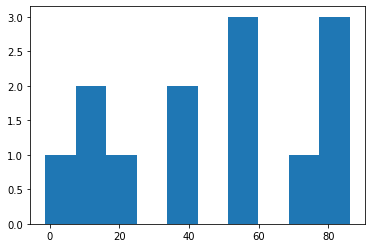

In [212]:
speedups = speedupRelevant['runtime-non'] - speedupRelevant['runtime-heur']
plt.hist(speedups)

In [213]:
# Speedup omitting the runs with more iterations - as stated in the paper this should only occur if an optimum is skipped:
speedupPositiveOnly = speedupRelevant[speedupRelevant['iterations-non'] >= speedupRelevant['iterations-heur']]

In [214]:
speedupPositiveOnly

,runtime-non,mse-non,iterations-non,runtime-heur,mse-achieved,mse-heur,iterations-heur,pim,stagnation
3,102.528977,67330018133488.57,5,50.442491,True,61026428161276.63,1,0.04,False
4,136.446405,62514447981196.59,7,50.324610,True,51976545111558.44,2,0.04,False
5,96.885039,54487618329490.99,4,62.957337,True,52442029640058.94,3,0.04,False
7,156.393783,52347369297079.984,8,78.420060,True,51034464971769.484,6,0.04,False
8,112.882778,60024089699527.23,5,55.696514,True,53697659276097.91,2,0.04,False
9,112.627126,57946966215954.33,5,55.981989,True,52697354078412.695,2,0.04,False
13,83.972906,55274065066050.62,3,71.889124,True,52289510005309.79,3,0.04,False
18,142.301126,72491345065102.06,6,62.748282,True,58843759611651.63,2,0.04,False
19,102.248161,60407894981584.83,4,65.045082,True,55625935918982.81,2,0.04,False


In [215]:
speedupPositiveOnly['runtime-non'].sum()/speedupPositiveOnly['runtime-heur'].sum()

1.890290740911042

(array([1., 0., 2., 0., 0., 4., 0., 1., 0., 1.]),
 array([1.16808915, 1.3224128 , 1.47673645, 1.6310601 , 1.78538374,
        1.93970739, 2.09403104, 2.24835469, 2.40267834, 2.55700198,
        2.71132563]),
 <a list of 10 Patch objects>)

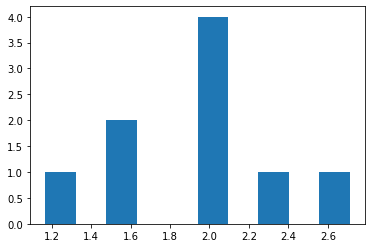

In [216]:
speedups = speedupPositiveOnly['runtime-non']/speedupPositiveOnly['runtime-heur']
plt.hist(speedups)

In [217]:
# % stagnated or more iterations
len(results[results['iterations-non'] < results['iterations-heur']  ])/len(results)

0.55